A) Plotting data using their coordinates

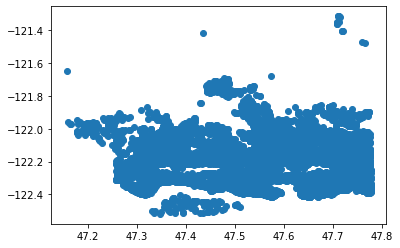

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('p2_dataset/data2_house_data.csv')
lat, long = data['lat'], data['long']

plt.scatter(lat, long)
plt.show()

In [2]:
y = data['price']
x = data.drop(columns=['price'])

In [3]:
print(x.info())

print(len(x['date']))
print(len(x['date'].unique()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

we can only work with numerical columns and from the cell above we find out that all the columns except
'date' are numerical. Cause the data itself is ordinal I think using ordinal encoder can perform well
although it has problems. The column 'id' also doesn't help our model, so we can drop it.

In [4]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
date = ordinal_encoder.fit_transform(x[['date']])
x['date'] = date
print(x.info())
x = x.drop(columns=['id'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

The range of the columns vary a lot, so we **must** normalize cause not only the model will be too weak
but also the columns with big numbers lead to nan.

In [5]:
print(x.info())
x=(x-x.mean())/x.std()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

B) Show correlation matrix

                     id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.016762  0.001286   0.005160    -0.012258 -0.132109   
price         -0.016762  1.000000  0.308350   0.525138     0.702035  0.089661   
bedrooms       0.001286  0.308350  1.000000   0.515884     0.576671  0.031703   
bathrooms      0.005160  0.525138  0.515884   1.000000     0.754665  0.087740   
sqft_living   -0.012258  0.702035  0.576671   0.754665     1.000000  0.172826   
sqft_lot      -0.132109  0.089661  0.031703   0.087740     0.172826  1.000000   
floors         0.018525  0.256794  0.175429   0.500653     0.353949 -0.005201   
waterfront    -0.002721  0.266369 -0.006582   0.063744     0.103818  0.021604   
view           0.011592  0.397293  0.079532   0.187737     0.284611  0.074710   
condition     -0.023783  0.036362  0.028472  -0.124982    -0.058753 -0.008958   
grade          0.008130  0.667434  0.356967   0.664983     0.762704  0.113621   
sqft_above    -0.010842  0.6

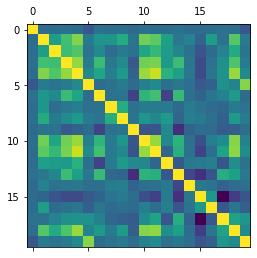

In [7]:
print(data.corr())
plt.matshow(data.corr())
plt.show()

If the correlation between two features is close to 1 or -1 it means we can find one feature using the other,
so keeping both of the features is not necessary, and we can drop one of them.<br/>
Here are some high correlations:<br/>
bathroom-sqft_living:0.75
sqft_livin-grade:0.76
sqft_livin-sqft_above:0.87
sqft_living-sqft_living15:0.75

sqft_lot-sqft_lot15:0.71
grade-sqft_above:0.75
grade-sqft_livin15:0.71

Considering the correlations I decided to drop 'sqft_above', 'sqft_living15',
 'sqft_lot15' and 'sqft_living'

In [8]:
X_train_chosen = X_train.drop(columns=['sqft_above', 'sqft_living15', 'sqft_lot15', 'sqft_living'])
X_test_chosen = X_test.drop(columns=['sqft_above', 'sqft_living15', 'sqft_lot15', 'sqft_living'])

D) It's asked to fit a model using gradient descent and choose the best parameters. The first thing
that may pop in mind is to use GridSearchCV but we can't use it because GridSearchCV can only work
with scikit-learn classes cause the estimators should implement certain functions like 'get_params'
I can either implement all the methods needed or use 'for loop' instead

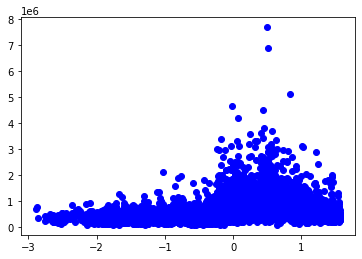

2.0868699843089388e+18
1.6096568046437916e+18


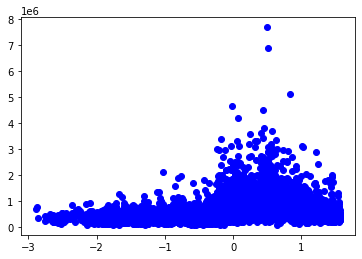

In [33]:
%run ../regression.ipynb

degrees = [3, 5, 7]
learning_rates = [0.2, 0.4, 0.6]
iterations = [1000, 10000, 100000]

mse = 100000000000000000000000000
mse_chosen = 10000000000000000000000
best_reg = None
best_reg_chosen = None

for degree in degrees:
    for learning_rate in learning_rates:
        for iteration in iterations:
            reg = regression(degree=degree)
            reg.train(np.array(X_train), np.array(y_train), learning_rate, iteration)
            err = mean_squared_error(y_test, reg.predict(np.array(X_test)))
            if err < mse:
                mse = err
                best_reg = reg

            reg_chosen = regression(degree=degree)
            reg_chosen.train(np.array(X_train_chosen), np.array(y_train), learning_rate, iteration)
            err = mean_squared_error(y_test, reg_chosen.predict(np.array(X_test_chosen)))
            if err < mse_chosen:
                mse_chosen = err
                best_reg_chosen = reg_chosen

plt.scatter(X_train['lat'], y_train, c='blue')
# plt.scatter(X_test['lat'], best_reg.predict(np.array(X_test)), c='red')
plt.show()
print(mse)

plt.scatter(X_train['lat'], y_train, c='blue')
# plt.scatter(X_test['lat'], best_reg_chosen.predict(np.array(X_test_chosen)), c='red')
plt.show()
print(mse_chosen)

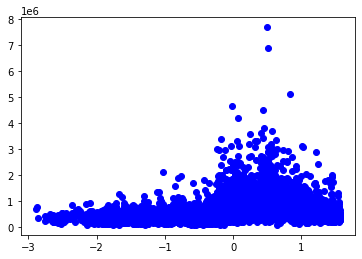

53636070123.60734
44336787601.35835


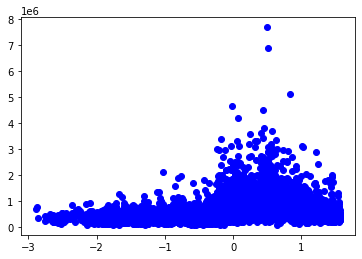

In [37]:
mse = 100000000000000000000000000
mse_chosen = 10000000000000000000000

for degree in degrees:
    reg = regression(degree=degree, method='normal_equation')
    reg.train(np.array(X_train), np.array(y_train), learning_rate, iteration)
    err = mean_squared_error(y_test, reg.predict(np.array(X_test)))
    if err < mse:
        mse = err
        best_reg = reg

    reg_chosen = regression(degree=degree, method='normal_equation')
    reg_chosen.train(np.array(X_train_chosen), np.array(y_train), learning_rate, iteration)
    err = mean_squared_error(y_test, reg_chosen.predict(np.array(X_test_chosen)))
    if err < mse_chosen:
        mse_chosen = err
        best_reg_chosen = reg_chosen

plt.scatter(X_train['lat'], y_train, c='blue')
# plt.scatter(X_test['lat'], best_reg.predict(np.array(X_test)), c='red')
plt.show()
print(mse)

plt.scatter(X_train['lat'], y_train, c='blue')
# plt.scatter(X_test['lat'], best_reg_chosen.predict(np.array(X_test_chosen)), c='red')
plt.show()
print(mse_chosen)